In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
breast_cancer_df = pd.read_csv('/kaggle/input/d/umeramin2004/breast-cancer-pred/breast-cancer.csv')
breast_cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
breast_cancer_df.shape

(569, 32)

In [4]:
len(breast_cancer_df)

569

In [5]:
breast_cancer_df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
new_breast_cancer_df = breast_cancer_df.drop(columns=['id'])
new_breast_cancer_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
new_breast_cancer_df['diagnosis'] = LabelEncoder().fit_transform(new_breast_cancer_df['diagnosis'])

In [8]:
new_breast_cancer_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [9]:
new_breast_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [10]:
new_breast_cancer_df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [11]:
new_breast_cancer_df.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


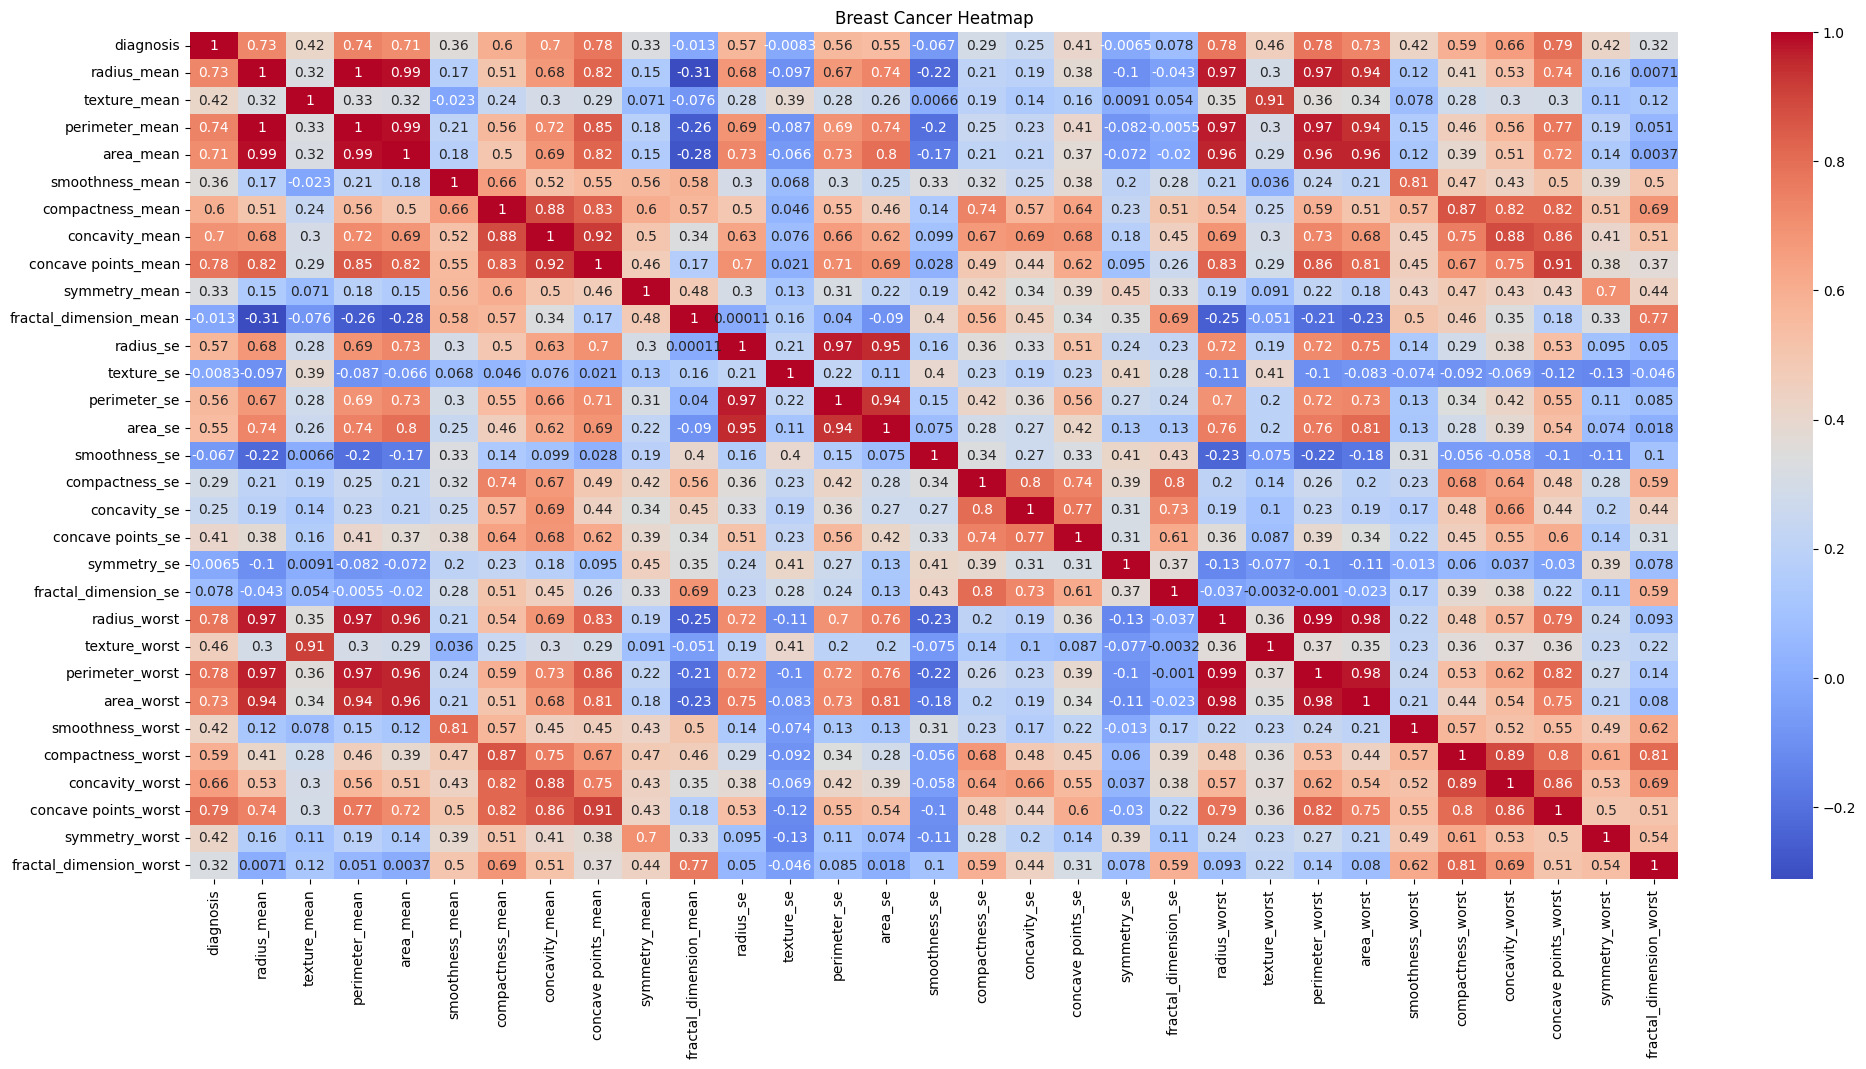

In [12]:
fig, ax = plt.subplots(figsize=(24, 11))

sns.heatmap(new_breast_cancer_df.corr(),

            annot=True,

            cmap='coolwarm',

            ax=ax)

plt.title('Breast Cancer Heatmap')

plt.show()

In [13]:
scaler = MinMaxScaler()
normalized_cancer_df = new_breast_cancer_df.copy()
normalized_cancer_df[new_breast_cancer_df.columns[1:]] = scaler.fit_transform(new_breast_cancer_df[new_breast_cancer_df.columns[1:]])

In [14]:
normalized_cancer_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,1,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,1,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,1,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [15]:
new_breast_cancer_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


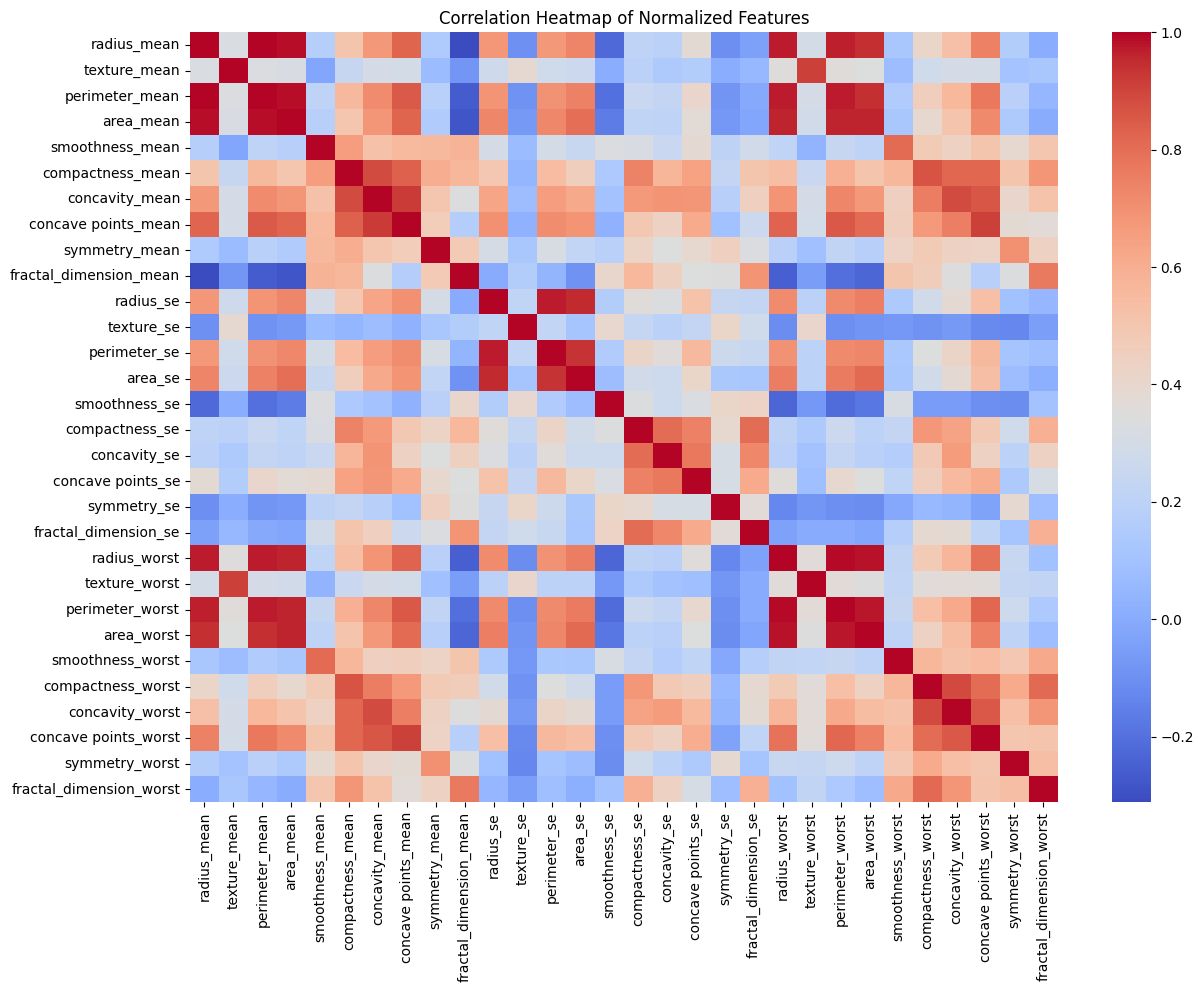

perimeter_mean        radius_mean            0.997855
perimeter_worst       radius_worst           0.993708
radius_mean           area_mean              0.987357
area_mean             perimeter_mean         0.986507
area_worst            radius_worst           0.984015
perimeter_worst       area_worst             0.977578
radius_se             perimeter_se           0.972794
perimeter_worst       perimeter_mean         0.970387
radius_worst          radius_mean            0.969539
perimeter_mean        radius_worst           0.969476
perimeter_worst       radius_mean            0.965137
radius_worst          area_mean              0.962746
area_mean             area_worst             0.959213
                      perimeter_worst        0.959120
area_se               radius_se              0.951830
area_worst            perimeter_mean         0.941550
                      radius_mean            0.941082
perimeter_se          area_se                0.937655
concave points_mean   concav

In [16]:
# Calculate the correlation matrix
correlation_matrix = normalized_cancer_df.iloc[:, 1:].corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap of Normalized Features")
plt.show()

# Display the most highly correlated feature pairs
high_corr_pairs = correlation_matrix.unstack().sort_values(ascending=False)
high_corr_pairs = high_corr_pairs[high_corr_pairs != 1].drop_duplicates()

high_corr_pairs[abs(high_corr_pairs) > 0.9]

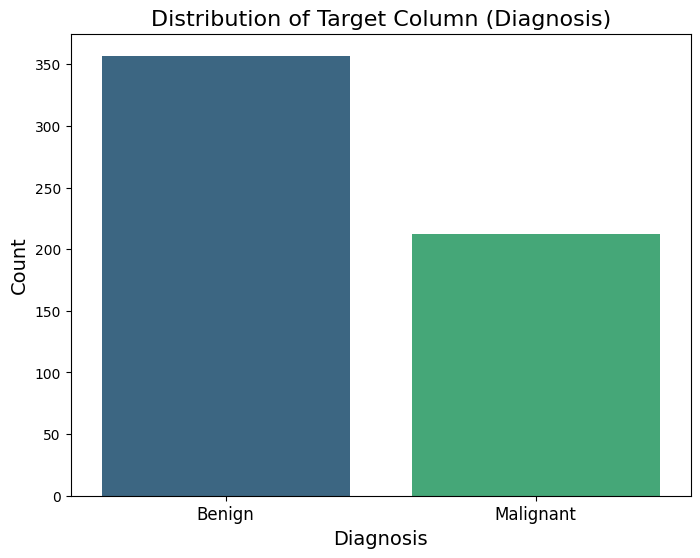

In [17]:
# Count the occurrences of each class in the target column
target_counts = normalized_cancer_df['diagnosis'].value_counts()

# Plot the bar graph
plt.figure(figsize=(8, 6))
sns.barplot(x=target_counts.index, y=target_counts.values, palette="viridis")
plt.title('Distribution of Target Column (Diagnosis)', fontsize=16)
plt.xlabel('Diagnosis', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks([0, 1],labels=['Benign', 'Malignant'], fontsize=12)
plt.show()

In [18]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, RocCurveDisplay, roc_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.model_selection import GridSearchCV

In [19]:
X = normalized_cancer_df.drop(columns=['diagnosis'])
y = normalized_cancer_df['diagnosis']

In [20]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


In [21]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                   test_size=0.2,
                                                   random_state=42)

In [23]:
X_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
204,0.259785,0.300643,0.257757,0.143542,0.424483,0.265076,0.187559,0.189911,0.436869,0.290017,...,0.250445,0.336354,0.227302,0.121092,0.471703,0.204238,0.213339,0.348797,0.285630,0.212908
70,0.565999,0.392289,0.551517,0.418452,0.338178,0.256181,0.253046,0.395179,0.263636,0.097936,...,0.602277,0.388060,0.575178,0.413095,0.317837,0.200163,0.214617,0.614777,0.194362,0.071166
131,0.401297,0.330402,0.400180,0.256797,0.510698,0.315686,0.343486,0.401938,0.439899,0.168492,...,0.403059,0.372601,0.370985,0.238596,0.550948,0.205790,0.302796,0.520275,0.250739,0.164961
431,0.256472,0.269530,0.260383,0.137561,0.476393,0.344212,0.181373,0.139115,0.379293,0.443555,...,0.176094,0.290245,0.195229,0.081252,0.487552,0.228590,0.191933,0.253265,0.195348,0.252853
540,0.215770,0.159959,0.213254,0.110032,0.426198,0.284093,0.157849,0.128926,0.382828,0.376158,...,0.154038,0.204158,0.141292,0.066998,0.418213,0.179013,0.143530,0.237732,0.150601,0.172504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,0.362488,0.241461,0.348421,0.221633,0.304956,0.146003,0.121649,0.138718,0.176263,0.075611,...,0.303451,0.357676,0.276856,0.158720,0.284158,0.174356,0.194649,0.269003,0.175439,0.071625
75,0.430167,0.336152,0.416765,0.285981,0.352532,0.198945,0.228889,0.329920,0.372727,0.083193,...,0.421202,0.334222,0.390408,0.255063,0.520571,0.171930,0.225958,0.522337,0.213877,0.057917
249,0.214823,0.176530,0.207864,0.111474,0.439379,0.180050,0.101406,0.145577,0.415657,0.246841,...,0.167912,0.244403,0.151751,0.075354,0.447269,0.127010,0.144089,0.330172,0.216637,0.151187
238,0.342610,0.613460,0.336950,0.203775,0.267220,0.259248,0.258435,0.219085,0.142424,0.238627,...,0.278193,0.760128,0.259425,0.142253,0.243875,0.208895,0.244728,0.282440,0.064065,0.150335


In [24]:
# Put models in a dictionary
models = {'Logistic Regression': LogisticRegression(),
         'Support Vector Classification': SVC(),
         'Random Forest': RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    '''
    Fits and evaluates given machine learning models.
    models: a dict of different SciKkit-Learn machine learning models
    X_train: training data (no labels)
    X_test: test data (no labels)
    y_train: traning labels
    y_test: testing labels
    '''
    
    # Set random seeds
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    #Loop through models
    for name, model in models.items():
        #Fit the model to the data
        model.fit(X_train, y_train)
        #Evaluate the model and append it's score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [25]:
model_scores = fit_and_score(models, 
                             X_train , 
                             X_test, 
                             y_train, 
                             y_test )
print(model_scores)

{'Logistic Regression': 0.9824561403508771, 'Support Vector Classification': 0.9736842105263158, 'Random Forest': 0.9649122807017544}


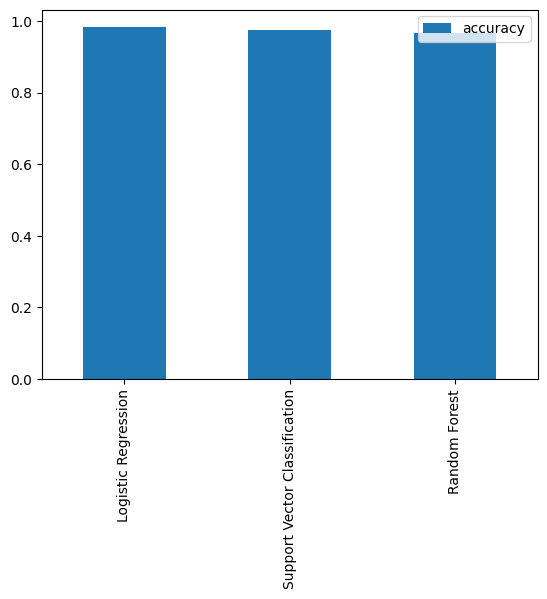

In [26]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

In [27]:
svm_cancer_model = SVC(kernel='rbf', 
                       C=1, 
                       gamma='scale', 
                       probability=True, 
                       random_state=42)
svm_cancer_model.fit(X_train, y_train)

SVC(C=1, probability=True, random_state=42)

In [28]:
print(f"The score for the breast cancer data: {svm_cancer_model.score(X_test, y_test)*100:.2f}%")

The score for the breast cancer data: 97.37%


In [29]:
y_pred = svm_cancer_model.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [30]:
y_prob = svm_cancer_model.predict_proba(X_test)[:, 1]
y_prob

array([2.62381888e-02, 9.99999748e-01, 9.99984396e-01, 3.30184371e-04,
       8.31240381e-05, 9.86947689e-01, 9.99996060e-01, 8.61693917e-01,
       6.34163922e-01, 6.21346769e-03, 5.22298196e-02, 9.83505456e-01,
       2.24841697e-02, 9.23193399e-01, 2.41742958e-03, 9.95067209e-01,
       3.60693602e-03, 4.72263045e-04, 9.11046656e-03, 9.99999887e-01,
       4.89575865e-02, 3.77564616e-03, 9.99998186e-01, 1.70643498e-03,
       4.73675007e-03, 3.02910443e-03, 9.21653001e-04, 4.93959333e-03,
       1.33313455e-03, 9.99999570e-01, 9.47253557e-04, 5.50320309e-04,
       8.04612063e-03, 5.12705628e-03, 5.04573614e-04, 3.66315168e-03,
       9.25883240e-01, 3.89816636e-03, 9.99999973e-01, 3.74908882e-02,
       5.35781156e-04, 9.99994220e-01, 8.70081223e-04, 8.84741078e-04,
       1.87324164e-02, 3.71834003e-02, 9.61621523e-03, 1.02127344e-02,
       2.90828139e-02, 5.77763746e-04, 9.99999982e-01, 9.99999993e-01,
       4.51354362e-01, 1.18981058e-02, 3.46471053e-04, 1.06120089e-02,
      

In [31]:
confusion_matrix_ = confusion_matrix(y_test, y_pred)
confusion_matrix_

array([[70,  1],
       [ 2, 41]])

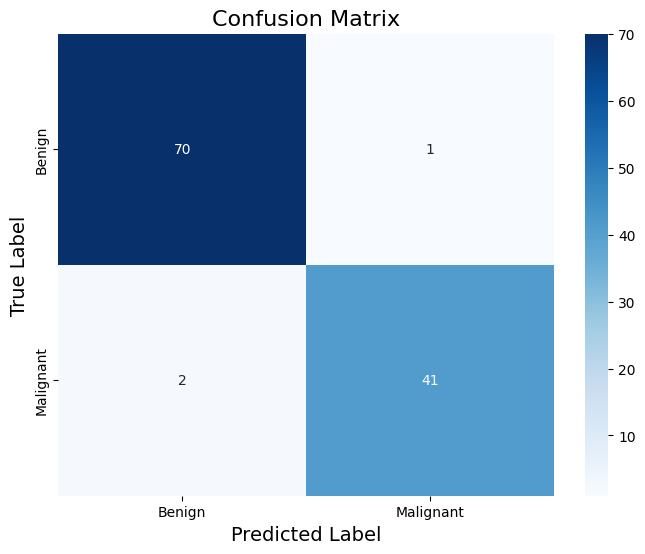

In [32]:
# Plotting confusion matrix for breast cancer
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()

In [33]:
cancer_class_report = classification_report(y_test, y_pred)
print(cancer_class_report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [34]:
roc_auc_curve_ = roc_auc_score(y_test, y_prob)
roc_auc_curve_

0.9967245332459875

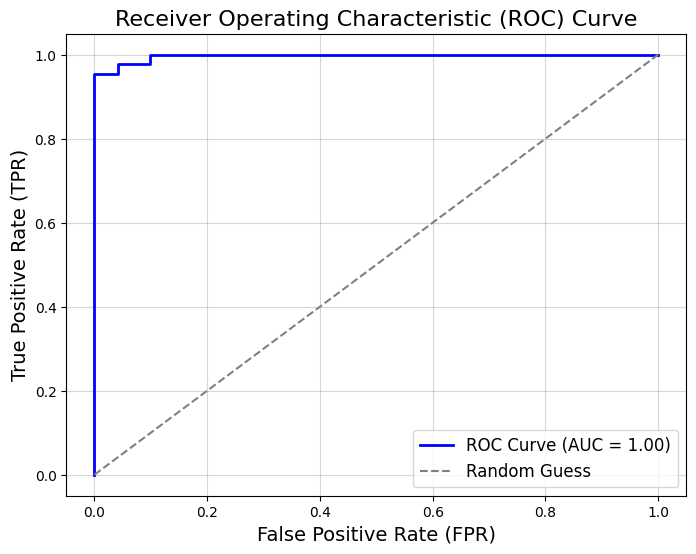

In [35]:
# Process the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)  # `y_prob` is the predicted probabilities
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')

# Customize the grapgh 
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.5)
plt.show()

In [36]:
cancer_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {cancer_accuracy*100:.2f}%')

Accuracy Score: 97.37%


In [37]:
f1_score_cancer_df = f1_score(y_test, y_pred)
print(f'F1 Score: {f1_score_cancer_df*100:.2f}%')

F1 Score: 96.47%


In [38]:
precision_ = precision_score(y_test, y_pred)
print(f'Precision Score: {precision_*100:.2f}%')

Precision Score: 97.62%


In [39]:
recall_ = recall_score(y_test, y_pred)
print(f'Recall Score: {recall_*100:.2f}%')

Recall Score: 95.35%


In [40]:
kappa = cohen_kappa_score(y_test, y_pred)
print(f'Kappa Score: {kappa*100:.2f}%')

Kappa Score: 94.37%


In [41]:
param_grid_for_gs = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'kernel': ['rbf', 'linear'],
    'class_weight': ['balanced'],
    'random_state': [42]
}

gs_cancer_df = GridSearchCV(svm_cancer_model,
                            param_grid_for_gs,
                            cv=5,
                            scoring='accuracy',
                            verbose=2)

In [42]:
gs_cancer_df.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=rbf, random_state=42; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=rbf, random_state=42; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=rbf, random_state=42; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=rbf, random_state=42; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=rbf, random_state=42; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=linear, random_state=42; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=linear, random_state=42; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=linear, random_state=42; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=linear, random_state=42; total time=   0.0s
[CV] END C=0.1, class_weig

GridSearchCV(cv=5, estimator=SVC(C=1, probability=True, random_state=42),
             param_grid={'C': [0.1, 1, 10, 100], 'class_weight': ['balanced'],
                         'gamma': ['scale', 'auto', 0.01, 0.1, 1],
                         'kernel': ['rbf', 'linear'], 'random_state': [42]},
             scoring='accuracy', verbose=2)

In [43]:
gs_cancer_df.score(X_test,y_test)

0.9736842105263158

In [44]:
print(f'Score: {gs_cancer_df.score(X_test,y_test)*100:.2f}%')

Score: 97.37%


In [45]:
print(f'Best Parameters: {gs_cancer_df.best_params_}')

Best Parameters: {'C': 1, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'rbf', 'random_state': 42}


In [46]:
best_params_score = SVC(kernel='rbf', 
                           C=1, 
                           gamma='scale', 
                           class_weight='balanced', 
                           random_state=42)

best_params_score.fit(X_train, y_train)

SVC(C=1, class_weight='balanced', random_state=42)

In [47]:
best_params_score.score(X_test, y_test)

0.9736842105263158

In [48]:
print(f'Best Score: {gs_cancer_df.best_score_*100:.2f}%') 

Best Score: 98.02%


In [49]:
print(f'Best Estimator: {gs_cancer_df.best_estimator_}')

Best Estimator: SVC(C=1, class_weight='balanced', probability=True, random_state=42)


In [50]:
feature_labels = list(breast_cancer_df.columns)
feature_labels.remove('diagnosis') 

# Combine test data, true labels, and predictions
error_analysis_df = pd.DataFrame(X_test, columns=feature_labels)  # Feature data
error_analysis_df['True Label'] = y_test.values
error_analysis_df['Predicted Label'] = y_pred
error_analysis_df['Prediction Probability'] = y_prob

# Filter misclassified samples
misclassified_samples = error_analysis_df[error_analysis_df['True Label'] != error_analysis_df['Predicted Label']]
print("Number of Misclassified Samples:", len(misclassified_samples))
print(misclassified_samples.head())

Number of Misclassified Samples: 3
     id  radius_mean  texture_mean  perimeter_mean  area_mean  \
81  NaN     0.300961      0.207981        0.295073   0.159703   
73  NaN     0.322732      0.205614        0.322300   0.186893   
255 NaN     0.330304      0.248225        0.329210   0.194655   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
81          0.498059          0.411386        0.273899             0.347266   
73          0.433962          0.333170        0.182498             0.251938   
255         0.514309          0.332863        0.229358             0.260736   

     symmetry_mean  ...  area_worst  smoothness_worst  compactness_worst  \
81        0.445455  ...    0.105609          0.544344           0.438348   
73        0.304040  ...    0.154149          0.461798           0.317170   
255       0.428283  ...    0.157491          0.528495           0.290004   

     concavity_worst  concave points_worst  symmetry_worst  \
81          0.388019

In [51]:
# Histogram of prediction probabilities for misclassified samples to be used for the future
plt.figure(figsize=(8, 5))
sns.histplot(misclassified['Prediction Probability'], kde=True, bins=20)
plt.title('Prediction Probabilities for Misclassified Samples')
plt.xlabel('Probability')
plt.ylabel('Count')
plt.show()

NameError: name 'misclassified' is not defined

<Figure size 800x500 with 0 Axes>

In [ ]:
# Compare a key feature for correctly classified vs misclassified samples
key_features_ = "radius_mean"  # Replace with any feature of interest

plt.figure(figsize=(8, 5))
sns.kdeplot(error_analysis_df.loc[error_analysis_df['True Label'] == error_analysis_df['Predicted Label'], key_feature], 
            label='Correctly Classified', shade=True, color='green')
sns.kdeplot(error_analysis_df.loc[error_analysis_df['True Label'] != error_analysis_df['Predicted Label'], key_feature], 
            label='Misclassified', shade=True, color='red')
plt.title(f'Distribution of {key_feature}')
plt.xlabel(key_feature)
plt.ylabel('Density')
plt.legend()
plt.show()

In [ ]:
# View a few misclassified samples
print(misclassified.sample(3))  # Randomly display 5 misclassified samples

In [ ]:
import pickle

# Save the model
with open("svm_breast_cancer_model.pkl", "wb") as file:
    pickle.dump(svm_cancer_model, file)


In [ ]:
import os
print(os.listdir("."))

In [ ]:
import pickle
with open("svm_breast_cancer_model.pkl", "rb") as file:
    model = pickle.load(file)
print("Model loaded successfully!")

In [ ]:
normalized_cancer_df

In [ ]:
path_to_model = "svm_breast_cancer_model.pkl"  # Replace with your filename
if os.path.exists(path_to_model):
    print(f"Model found: {path_to_model}")
else:
    print("Model file not found!")